In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 


In [2]:
df=pd.read_csv('Car details v3.csv')
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


STARTING WITH DATA-ANALYSIS
EDA




removing missing values


In [3]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
df.count()

name             8128
year             8128
selling_price    8128
km_driven        8128
fuel             8128
seller_type      8128
transmission     8128
owner            8128
mileage          7907
engine           7907
max_power        7913
torque           7906
seats            7907
dtype: int64

In [5]:
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 803.1+ KB


In [8]:
df['seats']=df['seats'].astype(str)

In [9]:


# Assuming df is your DataFrame
columns_to_convert = ['mileage', 'engine', 'max_power', 'torque', 'seats']


# Define a function to extract numeric values
def extract_numeric(value):
    numeric_part = pd.to_numeric(value.str.extract('(\d+\.\d+|\d+)', expand=False), errors='coerce')
    return numeric_part

# Apply the extraction function to all relevant columns
df[columns_to_convert] = df[columns_to_convert].apply(extract_numeric)

# Display data types after conversion
print(df[columns_to_convert].dtypes)


mileage      float64
engine         int64
max_power    float64
torque       float64
seats        float64
dtype: object


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_23708\3118324415.py:7: SyntaxWarning: invalid escape sequence '\d'
  numeric_part = pd.to_numeric(value.str.extract('(\d+\.\d+|\d+)', expand=False), errors='coerce')


In [10]:
df=df.drop('torque',axis=1)

In [11]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
7902,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
7903,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
7904,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


in column 1) transmission convert manual =1 and automatic=0
     2)owner 'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 3,
    'Test Drive Car': 3 
    3)fule_mapping={
     'Diesel':1,
      'Petrol':0,
     'LPG':3,
       'CNG':2,
}


In [12]:
# Assuming df is your DataFrame
transmission_mapping = {'Manual': 1, 
                        'Automatic': 0}
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 3,
    'Test Drive Car': 3  # Assign 0 for 'Test Drive Car' or any other appropriate value
}
fule_mapping={
     'Diesel':1,
      'Petrol':0,
     'LPG':3,
       'CNG':2,
}



# Fill NaN values in the 'transmission' and 'owner' columns with default values
df['transmission'] = df['transmission'].fillna('1')
df['owner'] = df['owner'].fillna('2')
df['fuel'] = df['fuel'].fillna('0')

# Apply the mapping to the 'transmission' and 'owner' columns
df['transmission'] = df['transmission'].map(transmission_mapping, na_action='ignore')
df['owner'] = df['owner'].map(owner_mapping, na_action='ignore')
df['fuel'] = df['fuel'].map(fule_mapping, na_action='ignore')

# Display the DataFrame after the mapping
df



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,Individual,1,1,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,Individual,1,2,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,Individual,1,3,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,Individual,1,1,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,Individual,1,1,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,0,Individual,1,1,18.50,1197,82.85,5.0
7902,Hyundai Verna CRDi SX,2007,135000,119000,1,Individual,1,3,16.80,1493,110.00,5.0
7903,Maruti Swift Dzire ZDi,2009,382000,120000,1,Individual,1,1,19.30,1248,73.90,5.0
7904,Tata Indigo CR4,2013,290000,25000,1,Individual,1,1,23.57,1396,70.00,5.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   int64  
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   int64  
 7   owner          7906 non-null   int64  
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   int64  
 10  max_power      7906 non-null   float64
 11  seats          7906 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 741.3+ KB


In [14]:
df.to_csv('cleaned_Car details v3.csv')

In [15]:
df_cpy=df.drop(['name','seller_type'],axis=1)
corr=df_cpy.corr()
corr

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
year,1.000000,0.412302,-0.428548,0.021498,-0.249002,-0.508820,0.328544,0.018263,0.226598,-0.007923
selling_price,0.412302,1.000000,-0.222158,0.167692,-0.590269,-0.231804,-0.126280,0.455682,0.749674,0.041617
km_driven,-0.428548,-0.222158,1.000000,0.260526,0.201186,0.292547,-0.172980,0.206031,-0.038159,0.227259
fuel,0.021498,0.167692,0.260526,1.000000,0.043164,0.032260,0.081586,0.434274,0.240914,0.308621
transmission,-0.249002,-0.590269,0.201186,0.043164,1.000000,0.151051,0.178986,-0.283206,-0.541870,0.072722
owner,-0.508820,-0.231804,0.292547,0.032260,0.151051,1.000000,-0.175907,0.008736,-0.111407,0.029351
mileage,0.328544,-0.126280,-0.172980,0.081586,0.178986,-0.175907,1.000000,-0.576408,-0.374621,-0.451700
engine,0.018263,0.455682,0.206031,0.434274,-0.283206,0.008736,-0.576408,1.000000,0.703975,0.611103
max_power,0.226598,0.749674,-0.038159,0.240914,-0.541870,-0.111407,-0.374621,0.703975,1.000000,0.191999
seats,-0.007923,0.041617,0.227259,0.308621,0.072722,0.029351,-0.451700,0.611103,0.191999,1.000000


<Axes: >

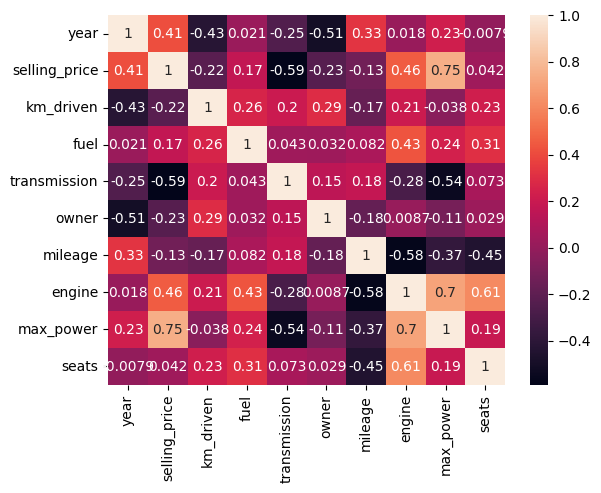

In [16]:
sns.heatmap(corr,annot=True)

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
x=df_cpy.drop('selling_price',axis=1)
y=df_cpy['selling_price']
x

,year,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,1,1,1,23.40,1248,74.00,5.0
1,2014,120000,1,1,2,21.14,1498,103.52,5.0
2,2006,140000,0,1,3,17.70,1497,78.00,5.0
3,2010,127000,1,1,1,23.00,1396,90.00,5.0
4,2007,120000,0,1,1,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...
7901,2013,110000,0,1,1,18.50,1197,82.85,5.0
7902,2007,119000,1,1,3,16.80,1493,110.00,5.0
7903,2009,120000,1,1,1,19.30,1248,73.90,5.0
7904,2013,25000,1,1,1,23.57,1396,70.00,5.0


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=15)
x_train.shape,x_test.shape
y_train.shape,y_test.shape

((7115,), (791,))

In [20]:
from sklearn.preprocessing import StandardScaler
scllar=StandardScaler()
x_train_scaled=scllar.fit_transform(x_train)
x_test_scaled=scllar.transform(x_test)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
men=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
score

0.7185178423433454

In [22]:
# from sklearn.linear_model import Lasso
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score
# lasso=Lasso()
# lasso.fit(x_train_scaled,y_train)
# y_pred=lasso.predict(x_test_scaled)
# mae=mean_absolute_error(y_test,y_pred)
# score=r2_score(y_test,y_pred)
# print("Mean absolute error", mae)
# print("R2 Score", score)

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
y_test,y_pred


Mean absolute error 260963.95219005074
R2 Score 0.7184997534016749


(7792     200000
 6026     300000
 4225     305000
 6518    5400000
 68       500000
          ...   
 3593     160000
 673      210000
 6665     434000
 6540      50000
 7779     270000
 Name: selling_price, Length: 791, dtype: int64,
 array([ 9.56020632e+04,  3.33324202e+05,  1.36451143e+05,  2.69004167e+06,
         9.79909892e+05,  6.73407024e+04,  5.54287012e+05,  5.24479072e+05,
         1.01865144e+06,  2.14819100e+05, -6.90717461e+05,  3.24856510e+06,
         1.40178526e+06,  6.56067668e+05,  6.13822382e+05,  1.17827928e+06,
         7.71844712e+05,  9.31335845e+05,  4.24996156e+05,  5.66108029e+05,
         6.13822382e+05,  7.79342873e+05,  3.76054204e+05,  4.92302043e+05,
         3.42902507e+05, -9.70518331e+04,  1.00794285e+06,  6.17817425e+05,
        -7.09050412e+04,  6.13822382e+05,  5.94685267e+05,  1.62942411e+05,
         6.40830884e+05,  5.42324406e+05,  9.99156480e+05,  1.07446222e+05,
         6.19060896e+05,  5.17930522e+05,  1.94360066e+04,  2.14288431e+06,
    

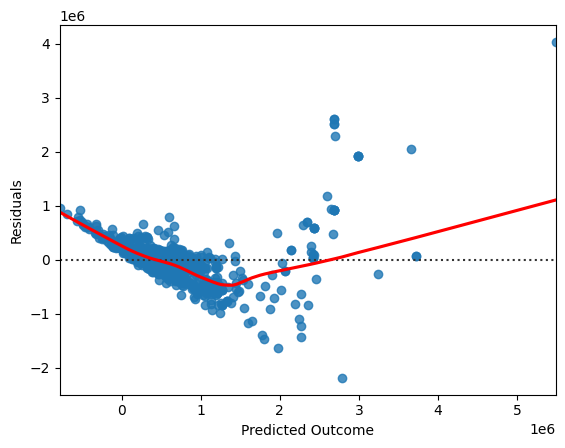

In [24]:
import seaborn as sns
import statsmodels.api as sm

# Assuming y_true is your array of true (actual) values
residuals = y_test - y_pred

# Plot residuals against predicted values
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Outcome')
plt.ylabel('Residuals')
plt.show()



In [26]:
import pickle
pickle.dump(scllar,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [27]:
x_train.columns

Index(['year', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'seats'],
      dtype='object')